In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

In [5]:
data_file_path = os.getcwd() + "/Data/"
print(data_file_path)

/Users/kavehz98/Documents/GitHub/TItanic-Kaggle-Competition/Data/


In [6]:
titanic0 = pd.read_csv(data_file_path + "train.csv")

# **Phase I**: Exploratory Data Analysis

In [7]:
titanic0.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"braund, mr. owen harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"heikkinen, miss. laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"futrelle, mrs. jacques heath (lily may peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"allen, mr. william henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Here, I'd like to get a good look at how many NaN values we have in the dataset
titanic0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Initializing `titanic1`: 2nd copy of the Dataset

In [9]:
# Making a copy of the dataset
titanic1 = titanic0.copy()

### **Observation**: The majority of the `Cabin` data is missing along with about a quarter of the `Age` data. Plan is to drop the `Cabin` feature while trying to fill in as much of the `Age` feature.

In [10]:
titanic1 = titanic1.drop(labels="Cabin", axis=1)
titanic1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"braund, mr. owen harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"heikkinen, miss. laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"futrelle, mrs. jacques heath (lily may peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"allen, mr. william henry",male,35.0,0,0,373450,8.0500,S


### Now dealing with missing `Age` data...

In [11]:
missing_age_data = titanic0[titanic0['Age'].isnull()]
missing_age_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"moran, mr. james",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"williams, mr. charles eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"masselmani, mrs. fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"emir, mr. farred chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"o'dwyer, miss. ellen ""nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [12]:
# Only run once: missing_age_data.to_csv("missing_age_data.csv")

### Initializing `titanic2`: 3rd copy of data

In [13]:
titanic2 = titanic1.copy()

In [14]:
# Parsing the Name Feature to only extract family names
# Plan: Potentially look at last names, group by it, and find out Sibling Parent relations and apply a typical age range 
titanic2[['LastName', 'FirstName']] = titanic2['Name'].str.split(', ', expand=True)

In [15]:
titanic2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,FirstName
0,1,0,3,"braund, mr. owen harris",male,22.0,1,0,A/5 21171,7.2500,S,braund,mr. owen harris
1,2,1,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,PC 17599,71.2833,C,cumings,mrs. john bradley (florence briggs thayer)
2,3,1,3,"heikkinen, miss. laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,heikkinen,miss. laina
3,4,1,1,"futrelle, mrs. jacques heath (lily may peel)",female,35.0,1,0,113803,53.1000,S,futrelle,mrs. jacques heath (lily may peel)
4,5,0,3,"allen, mr. william henry",male,35.0,0,0,373450,8.0500,S,allen,mr. william henry


In [16]:
# Dropped Name Column from dataset
titanic2 = titanic2.drop(labels='Name', axis=1)

In [17]:
titanic2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,FirstName
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,braund,mr. owen harris
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,cumings,mrs. john bradley (florence briggs thayer)
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,heikkinen,miss. laina
3,4,1,1,female,35.0,1,0,113803,53.1000,S,futrelle,mrs. jacques heath (lily may peel)
4,5,0,3,male,35.0,0,0,373450,8.0500,S,allen,mr. william henry


# **Phase II**: Cleaning Data

### Initializing `titanic3`: 4th copy of data

In [34]:
titanic3 = titanic2.copy()

In [35]:
def isMissingData(age):
    if pd.isna(age) == True:
        return True
    else:
        return False

In [36]:
titanic3['MissingAge'] = titanic3['Age'].apply(isMissingData)

In [37]:
titanic3.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,FirstName,MissingAge
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,braund,mr. owen harris,False
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,cumings,mrs. john bradley (florence briggs thayer),False
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,heikkinen,miss. laina,False
3,4,1,1,female,35.0,1,0,113803,53.1000,S,futrelle,mrs. jacques heath (lily may peel),False
4,5,0,3,male,35.0,0,0,373450,8.0500,S,allen,mr. william henry,False


In [38]:
# Try to group data by Last Name
titanic_analysis0 = titanic3.groupby(by=['LastName', 'MissingAge']).count()

In [39]:
titanic_analysis0.head(10)

,,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FirstName
LastName,MissingAge,,,,,,,,,,,
abbing,False,1,1,1,1,1,1,1,1,1,1,1
abbott,False,2,2,2,2,2,2,2,2,2,2,2
abelson,False,2,2,2,2,2,2,2,2,2,2,2
adahl,False,1,1,1,1,1,1,1,1,1,1,1
adams,False,1,1,1,1,1,1,1,1,1,1,1
ahlin,False,1,1,1,1,1,1,1,1,1,1,1
aks,False,1,1,1,1,1,1,1,1,1,1,1
albimona,False,1,1,1,1,1,1,1,1,1,1,1
alexander,False,1,1,1,1,1,1,1,1,1,1,1


In [40]:
# Here, I'd like to create a list of all family names that have both missing and non-missing ages

last_names_mixed_age = []
multiindex_list = list(titanic_analysis0.index)

for i in range(len(multiindex_list)):
    if i != len(multiindex_list) - 1:
        if multiindex_list[i][0] == multiindex_list[i+1][0]:
            last_names_mixed_age.append(multiindex_list[i][0])

print(last_names_mixed_age)
print(len(last_names_mixed_age))      

['boulos', 'bourke', 'elias', 'flynn', 'frauenthal', 'goldenberg', 'hart', 'hoyt', 'kelly', 'meyer', 'olsen', 'petroff', 'saad', 'smith', 'taylor', 'webber', 'williams', 'zabour']
18


In [41]:
# Double checking that the correct rationale was followed
titanic3[titanic3['LastName'].isin(last_names_mixed_age)].sort_values(['LastName', 'MissingAge']).head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,FirstName,MissingAge
852,853,0,3,female,9.0,1,1,2678,15.2458,C,boulos,miss. nourelain,False
140,141,0,3,female,NaN,0,2,2678,15.2458,C,boulos,mrs. joseph (sultana),True
598,599,0,3,male,NaN,0,0,2664,7.2250,C,boulos,mr. hanna,True
188,189,0,3,male,40.0,1,1,364849,15.5000,Q,bourke,mr. john,False
657,658,0,3,female,32.0,1,1,364849,15.5000,Q,bourke,mrs. john (catherine),False
593,594,0,3,female,NaN,0,2,364848,7.7500,Q,bourke,miss. mary,True
352,353,0,3,male,15.0,1,1,2695,7.2292,C,elias,mr. tannous,False
532,533,0,3,male,17.0,1,1,2690,7.2292,C,elias,mr. joseph jr,False
773,774,0,3,male,NaN,0,0,2674,7.2250,C,elias,mr. dibo,True
572,573,1,1,male,36.0,0,0,PC 17474,26.3875,S,flynn,"mr. john irwin (""irving"")",False


## LOG: as of July 16th, 11:08 PM
#### Left off from the top to here. 
#### Plan for filling in missing ages:
#### 1. Systematically figure out the age of the people in the data above
####    a. Sources listed in the comment below
####    b. In the early 1900s (lines up with Titanic sinking in 1912), women had children between the ages of 21 and 33 at about 3.5 children per family, leaving the age difference between siblings to be around 3-4 years apart.

#### c. Here is another consideration: Married couples in the 1900s were typically 4 years apart (with the male counterpart being the older of the two).


In [42]:
# Reapplying Missing Age column formula, to get up to date values
titanic3['MissingAge'] = titanic3['Age'].apply(isMissingData)

In [43]:
titanic3[(titanic3['MissingAge'] == True) & (titanic3['Survived'] == 1)].count()

PassengerId    52
Survived       52
Pclass         52
Sex            52
Age             0
               ..
Fare           52
Embarked       52
LastName       52
FirstName      52
MissingAge     52
Length: 13, dtype: int64

In [44]:
titanic3[(titanic3['MissingAge'] == True) & (titanic3['Pclass'] == 3) & (titanic3['Survived'] == 1)].count()

PassengerId    34
Survived       34
Pclass         34
Sex            34
Age             0
               ..
Fare           34
Embarked       34
LastName       34
FirstName      34
MissingAge     34
Length: 13, dtype: int64

In [45]:
titanic3[(titanic3['MissingAge'] == True) & (titanic3['Survived'] == 1)].head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,FirstName,MissingAge
17,18,1,2,male,NaN,0,0,244373,13.0000,S,williams,mr. charles eugene,True
19,20,1,3,female,NaN,0,0,2649,7.2250,C,masselmani,mrs. fatima,True
28,29,1,3,female,NaN,0,0,330959,7.8792,Q,o'dwyer,"miss. ellen ""nellie""",True
31,32,1,1,female,NaN,1,0,PC 17569,146.5208,C,spencer,mrs. william augustus (marie eugenie),True
32,33,1,3,female,NaN,0,0,335677,7.7500,Q,glynn,miss. mary agatha,True
36,37,1,3,male,NaN,0,0,2677,7.2292,C,mamee,mr. hanna,True
47,48,1,3,female,NaN,0,0,14311,7.7500,Q,o'driscoll,miss. bridget,True
55,56,1,1,male,NaN,0,0,19947,35.5000,S,woolner,mr. hugh,True
65,66,1,3,male,NaN,1,1,2661,15.2458,C,moubarek,master. gerios,True
82,83,1,3,female,NaN,0,0,330932,7.7875,Q,mcdermott,miss. brigdet delia,True


## **Filling in Missing Values**: `Age`

#### Note: I found a complementary dataset that contains majority of missing age values and I've extracted the missing ages in a 
#### separate CSV file, `age_data.csv`, where there is a PassengerId Column and an associated Age column

In [47]:
age_data = pd.read_csv(data_file_path + "age_data.csv")
age_data = age_data.set_index("PassengerId")
age_data.head()

,Age
PassengerId,
18,51
20,22
27,29
29,25
30,23


In [49]:
titanic3 = titanic3.set_index('PassengerId')
titanic3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,FirstName,MissingAge
PassengerId,,,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,braund,mr. owen harris,False
2,1,1,female,38.0,1,0,PC 17599,71.2833,C,cumings,mrs. john bradley (florence briggs thayer),False
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,heikkinen,miss. laina,False
4,1,1,female,35.0,1,0,113803,53.1000,S,futrelle,mrs. jacques heath (lily may peel),False
5,0,3,male,35.0,0,0,373450,8.0500,S,allen,mr. william henry,False


In [50]:
### My initial rough method of filling in the missing ages based on PassengerId as a key and Age as the value.

# passenger_age_dict = {}

# for i in range(age_data.shape[0]):
#     passenger_age_dict[age_data['PassengerId'][i]] = age_data['Age'][i]

# for passenger_id in passenger_age_dict.keys():
#     titanic3.iloc[passenger_id - 1, 4] = passenger_age_dict[passenger_id]
# titanic3.info()

### After some research, I found a more efficient way to perform a Vlookup

# Initialize column where the new age data will be appended
titanic3['Age_NEW'] = None

# Mapping age_data onto titanic3 dataset
titanic3['Age_NEW'] = titanic3.index.map(age_data['Age'])

In [52]:
### Continuation of the Vlookup
# Creating an list of passenger IDs to be used to fill in missing age data
indices = titanic3[titanic3['Age_NEW'].notnull()].index

# Replacing all missing ages in Age column with Age_NEW values that are not NaN
for i in indices:
    titanic3.iloc[i-1, 3] = titanic3.iloc[i-1, 12]

# Checking to see if the values match
titanic3[titanic3['Age_NEW'].notnull()].head(7)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,FirstName,MissingAge,Age_NEW
PassengerId,,,,,,,,,,,,,
18,1,2,male,51.0,0,0,244373,13.0000,S,williams,mr. charles eugene,True,51.0
20,1,3,female,22.0,0,0,2649,7.2250,C,masselmani,mrs. fatima,True,22.0
27,0,3,male,29.0,0,0,2631,7.2250,C,emir,mr. farred chehab,True,29.0
29,1,3,female,25.0,0,0,330959,7.8792,Q,o'dwyer,"miss. ellen ""nellie""",True,25.0
30,0,3,male,23.0,0,0,349216,7.8958,S,todoroff,mr. lalio,True,23.0
32,1,1,female,57.0,1,0,PC 17569,146.5208,C,spencer,mrs. william augustus (marie eugenie),True,57.0
33,1,3,female,19.0,0,0,335677,7.7500,Q,glynn,miss. mary agatha,True,19.0


In [54]:
# Dropping unnecessary columns
titanic3 = titanic3.drop(['Ticket', 'LastName', 'FirstName', 'MissingAge', 'Age_NEW'],axis=1)

In [55]:
titanic3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       869 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [56]:
titanic3 = titanic3.dropna(axis=0)
titanic3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 867 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  867 non-null    int64  
 1   Pclass    867 non-null    int64  
 2   Sex       867 non-null    object 
 3   Age       867 non-null    float64
 4   SibSp     867 non-null    int64  
 5   Parch     867 non-null    int64  
 6   Fare      867 non-null    float64
 7   Embarked  867 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 61.0+ KB


## LOG: All missing values have been taken care of and unnecessary columns have been dropped

# **Phase III**: Feature Engineering

In [57]:
# Creating a correlation matrix to see how the variables relate to one another
correlation_matrix = titanic3.corr(numeric_only=True)

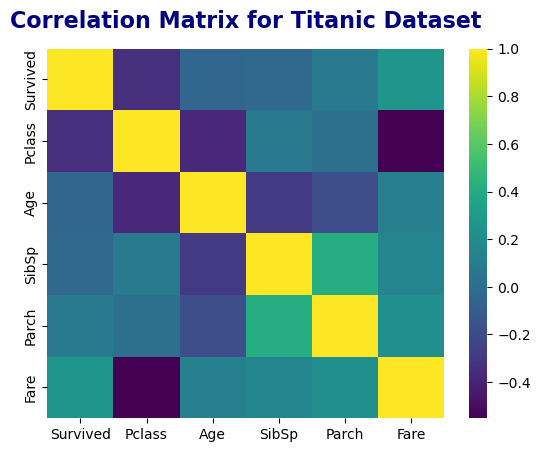

In [84]:
# Let's throw that on a heatmap for a visual and to get some good practice
sns.heatmap(correlation_matrix, cmap="viridis")
plt.title("Correlation Matrix for Titanic Dataset",pad=15, fontdict={'weight': 'heavy', 'size': 16, 'color': 'navy'})
plt.show()

## Part A:  One Hot Encoding categorical data

### Dealing with Sex feature

In [59]:
# This method (one hot encoding) is especially useful when our feature is not ordinal
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

sex_data_values = np.array(titanic3['Sex'])

sex_label_encoder = LabelEncoder()
sex_integer_encoded = sex_label_encoder.fit_transform(sex_data_values)
print(sex_integer_encoded)

sex_onehot_encoder = OneHotEncoder(sparse_output=False)
sex_integer_encoded = sex_integer_encoded.reshape(len(sex_integer_encoded), 1)
sex_onehot_encoded = sex_onehot_encoder.fit_transform(sex_integer_encoded)
print(sex_onehot_encoded)

[1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1
 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1
 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1
 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1
 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1
 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1
 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1
 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0
 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1
 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0
 1 1 1 1 1 1 1 1 0 1 0 1 

In [62]:
male_data = []
female_data = []

for element in sex_onehot_encoded:
    male_data.append(element[1])
    female_data.append(element[0])
    
male_data = np.array(male_data)
female_data = np.array(female_data)

titanic3['Male'] = male_data.tolist()
titanic3['Female'] = female_data.tolist()

titanic3.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Male,Female
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,S,1.0,0.0
2,1,1,38.0,1,0,71.2833,C,0.0,1.0
3,1,3,26.0,0,0,7.9250,S,0.0,1.0
4,1,1,35.0,1,0,53.1000,S,0.0,1.0
5,0,3,35.0,0,0,8.0500,S,1.0,0.0


In [65]:
# titanic3 = titanic3.drop('Sex', axis=1)

### Dealing with Embarked Feature

In [66]:
titanic3['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [67]:
embarked_data_values = np.array(titanic3['Embarked'])

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(embarked_data_values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse_output=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 1 2 2 0 2 2 1 2 2 2 0 2 1 2 0 0 1 2 0 2 0 2
 2 0 2 2 0 0 1 2 1 1 0 2 2 2 0 2 0 2 2 0 2 2 0 2 2 0 0 2 2 2 2 2 2 2 0 2 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 1 2 0 2
 2 0 2 1 2 0 2 2 2 0 2 2 0 1 2 2 0 2 2 2 2 0 2 2 2 0 0 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 0 2 2 0 2 2 2 0 2 2 2 2 1 2
 1 2 2 2 2 2 0 0 1 2 1 2 2 2 2 0 2 2 2 0 1 0 2 2 2 2 1 0 2 2 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 2 2 0 1 2 2 2 2 2 2 2 2 2 0 0 2 0 2 1 2
 2 2 1 2 2 2 2 2 2 2 2 0 1 2 2 2 1 2 1 2 2 2 2 0 2 2 2 1 2 0 0 2 2 0 0 2 2
 0 1 1 2 1 2 2 0 0 0 0 0 0 2 2 2 2 2 2 2 0 2 2 1 2 2 0 2 2 2 0 1 2 2 2 2 2
 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 1 1 2 0 0 2 1 2 0 0 1 0 0 2 2 0 2
 0 2 0 0 2 0 0 2 2 2 2 2 2 1 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 1 2 2 2 2 2 2 2 0 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2
 2 2 0 0 2 0 2 2 2 1 2 2 2 2 2 2 2 2 1 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2
 0 2 2 2 2 2 0 2 0 2 2 2 

In [68]:
embarked_s = []
embarked_c = []
embarked_q = []

for element in onehot_encoded:
    embarked_s.append(element[2])
    embarked_c.append(element[0])
    embarked_q.append(element[1])

embarked_s = np.array(embarked_s)
embarked_c = np.array(embarked_c)
embarked_q = np.array(embarked_q)

titanic3['Embarked_S'] = embarked_s.tolist()
titanic3['Embarked_C'] = embarked_c.tolist()
titanic3['Embarked_Q'] = embarked_q.tolist()

titanic3.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Male,Female,Embarked_S,Embarked_C,Embarked_Q
PassengerId,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,S,1.0,0.0,1.0,0.0,0.0
2,1,1,38.0,1,0,71.2833,C,0.0,1.0,0.0,1.0,0.0
3,1,3,26.0,0,0,7.9250,S,0.0,1.0,1.0,0.0,0.0
4,1,1,35.0,1,0,53.1000,S,0.0,1.0,1.0,0.0,0.0
5,0,3,35.0,0,0,8.0500,S,1.0,0.0,1.0,0.0,0.0


In [69]:
# Removing Embarked column
titanic3 = titanic3.drop('Embarked', axis=1)

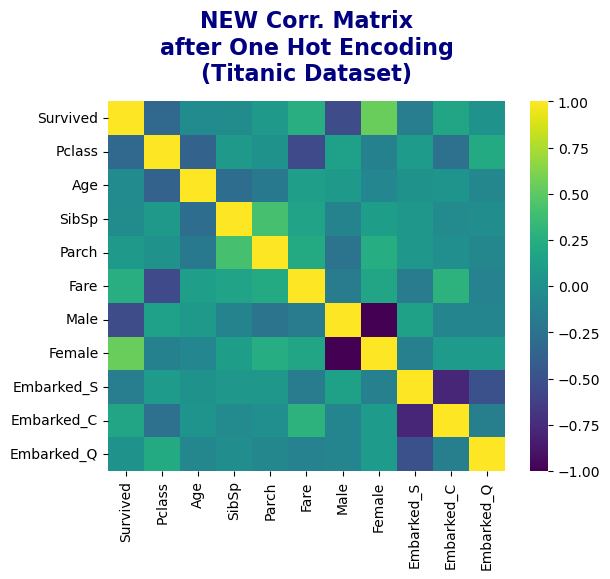

In [83]:
new_correlation_matrix = titanic3.corr()
sns.heatmap(new_correlation_matrix, cmap="viridis")
plt.title("NEW Corr. Matrix\nafter One Hot Encoding\n(Titanic Dataset)",pad=15, fontdict={'weight': 'heavy', 'size': 16, 'color': 'navy'})
plt.show()

# **Phase IV**: Splitting Data into Training and Testing sets

In [107]:
from sklearn.model_selection import train_test_split

X = titanic3.drop('Survived', axis=1)
Y = titanic3['Survived']

# performing 80-20 train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

## Ensuring that original distribution matches that of training and testing subsets

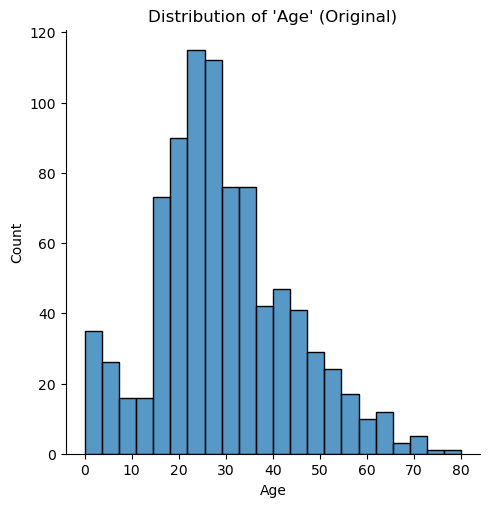

In [108]:
sns.displot(titanic3['Age'])
plt.title("Distribution of 'Age' (Original)")
plt.show()

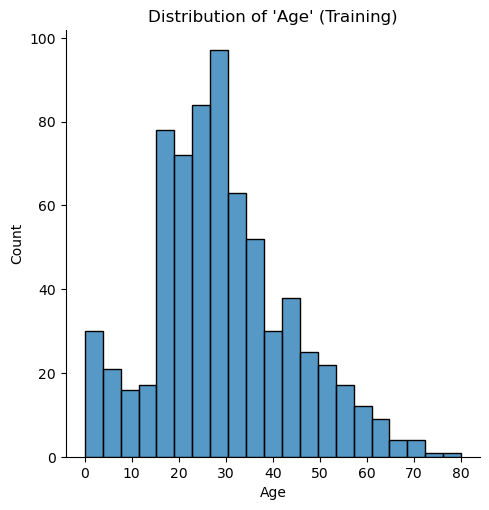

In [109]:
sns.displot(X_train['Age'])
plt.title("Distribution of 'Age' (Training)")
plt.show()

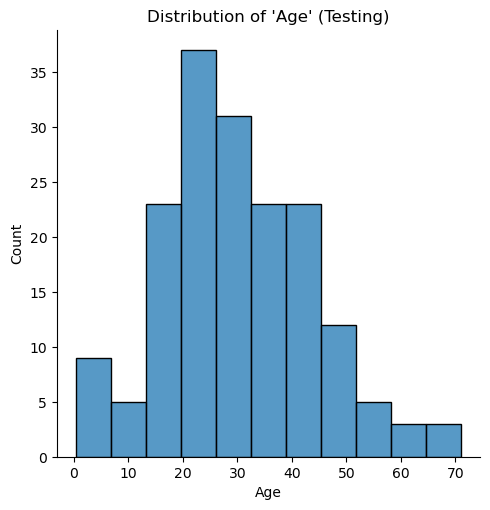

In [110]:
sns.displot(X_test['Age'])
plt.title("Distribution of 'Age' (Testing)")
plt.show()

# **Phase V**: Running Models

## Key assumptions for Logistic Regression model:

### 1. Logistic Regression model requires the dependent variable to be binary, multinomial or ordinal in nature.
#### Status: Met, survival is a binary 1 or 0

### 2. It requires the observations to be independent of each other. So, the observations should not come from repeated measurements.
#### Status: **TBD**

### 3. Logistic Regression algorithm requires little or no multicollinearity among the independent variables. It means that the independent variables should not be too highly correlated with each other.
#### Status: **TBD**

### 4. Logistic Regression model assumes linearity of independent variables and log odds.
#### Status: **TBD**

### 5. The success of Logistic Regression model depends on the sample sizes. Typically, it requires a large sample size to achieve the high accuracy.
#### Status: Met, NIH defines large as 500+ sample size and we're using ~700 passengers to train Logistic Regression model.

In [215]:
# Running the regression model
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(C=1, solver="liblinear", random_state=0)

logreg_model.fit(X_train, Y_train)

Y_pred_logreg = logreg_model.predict(X_test)

## Random Forest Classification Model

In [216]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)

rfc.fit(X_train, Y_train)

Y_pred_rfc = rfc.predict(X_test)

## Gradient Boosting Classifier Model

In [219]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)

gb.fit(X_train,Y_train)

Y_pred_gb = gb.predict(X_test)

In [221]:
from sklearn.metrics import accuracy_score

print('Logistic Regression Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred_logreg)))
print('Random Forest Classifier Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred_rfc)))
print('Gradient Boost Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred_gb)))

Logistic Regression Model accuracy score: 0.7874
Random Forest Classifier Model accuracy score: 0.8276
Gradient Boost Model accuracy score: 0.8563


# **Phase VI**: Working on the Testing Dataset

In [154]:
testing_data = pd.read_csv(data_file_path + "test.csv")
testing_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [153]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


# Here is the plan:

### 1. Rank features using random forest classifier and then rerunning all three models after dropping a few

### 2. Picked the best Model: Gradient Boosting Classifier
### 3. Explain the problem from a business perspective (insurance companies)
### 3.5 Perform analysis on Testing data (pain), filling missing age, one hot encoding, ...
### 4. Submit results to competition
### 5. Fully Document it
### 6. 
### 10. Due Date: Wednesday
### 11. Create a video out of it